# Focus on the 2007-2008 Financial Crises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import time

In [2]:
# Standard plotly imports
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='Abcde54321',                                              
                                  api_key='hcooLngkiMrN7qXHBs5s')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('48_Industry_Portfolios_daily.CSV', index_col = 0)
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,1,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.



,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
19260701,0.56,-0.07,NaN,-1.39,0,-1.44,0.62,-1.27,-0.9,0.12,...,-0.93,0.15,2.77,-0.02,0.27,0.59,0.47,0.81,0.69,-1.66
19260702,0.29,0.06,NaN,0.78,0.7,1.46,0.03,0,-0.34,-0.35,...,1.07,0.06,0,0.01,-0.1,1.04,-0.03,-0.61,-0.45,3.09
19260706,-0.33,0.18,NaN,-1.74,0.5,-0.96,-0.06,4.27,-1.2,0.41,...,0.73,-0.19,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.04,1.41
19260707,3.57,-0.15,NaN,-1.73,-0.12,-0.49,-0.06,-4.1,-0.22,0.16,...,2.22,0.18,-3.21,-0.57,-0.7,-1.09,0.21,0.07,-0.4,0.62
19260708,0.3,1.12,NaN,-0.15,0.3,-0.49,0.24,0,-0.01,0.79,...,-0.39,0.46,-1.1,-0.38,0.33,0.99,-0.88,-0.36,-0.93,0.98


In [4]:
df = df.loc[df.index != '  Average Equal Weighted Returns -- Daily']
df.index = pd.to_datetime(df.index.astype(str), format='%Y%m%d')
df['Soda '].loc[df['Soda '] == ' NaN'] = None
df = df.sort_index()
df = df[:-1]

In [5]:
df.columns

Index(['Agric', 'Food ', 'Soda ', 'Beer ', 'Smoke', 'Toys ', 'Fun  ', 'Books',
       'Hshld', 'Clths', 'Hlth ', 'MedEq', 'Drugs', 'Chems', 'Rubbr', 'Txtls',
       'BldMt', 'Cnstr', 'Steel', 'FabPr', 'Mach ', 'ElcEq', 'Autos', 'Aero ',
       'Ships', 'Guns ', 'Gold ', 'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm',
       'PerSv', 'BusSv', 'Comps', 'Chips', 'LabEq', 'Paper', 'Boxes', 'Trans',
       'Whlsl', 'Rtail', 'Meals', 'Banks', 'Insur', 'RlEst', 'Fin  ', 'Other'],
      dtype='object')

In [6]:
df.tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
2017-10-27,0.09,0.12,-0.32,-0.36,-1.10,-1.20,1.04,-0.54,-0.59,-0.57,...,-0.09,-0.26,-1.46,2.79,0.19,0.29,0.32,-0.04,-0.12,-0.55
2017-10-30,-1.99,-1.74,-1.43,-0.54,-1.58,-0.11,-1.06,-1.15,-0.95,-1.58,...,-1.42,-1.31,-0.86,-1.9,-0.54,-1.76,-0.74,-1.03,-1.25,-0.14
2017-10-30,-0.35,-1.88,-0.39,-0.44,-1.24,1.38,-0.79,-0.56,-1.03,-1.14,...,-0.85,-1.17,-0.36,-0.45,0.20,-0.58,-0.58,-0.68,-0.81,-0.58
2017-10-31,0.00,2.41,0.56,1.26,0.08,-3.98,1.05,-0.22,0.53,-1.34,...,0.95,-0.45,0.97,0.01,0.08,-0.14,0.01,0.91,0.09,-0.50
2017-10-31,1.29,1.42,1.18,2.55,-0.03,-2.52,0.98,0.59,0.54,-1.41,...,-1.68,0.7,0.61,-0.2,0.17,0.58,0.39,1.17,0.02,0.62


We have noticed the fact that there are two sets of data in the main dataset, so every day is reported twice, once for each set of data. The difference between the two is that in one case the industrial index is computed averaging over the stocks of that industry with equal weight, in the other case stocks are weighted by market capitalization. As we do not know which version of the day corresponds to which method of computing, we have decided to only keep the first appearance of every date.

In [7]:
df = df.groupby(df.index).first() 

We will make this study, on two different datasets and here are the justification of it:
- First, we are using the whole dataset, that is to say daily returns of 40 industries (we took out soda, rubber, health, FabPr (Fabric Products), guns, gold, PerSv (personal service), and paper as it had missing values)
- Second, we are using values since 2001-2007 to train the dataset and the 2007-2008 financial crisis as testing dataset. We chose this interval to look at how a portfolio made before a financial crisis would work during the financial crisis.

## 2nd Study: 2008 Financial Crisis

### Correlation

In [8]:
df1 = df[20048:]

In [9]:
for i in df1.columns:
    df1[i] = df1[i].astype(float)

In [10]:
corr = df1.corr(method='pearson')
corr

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Agric,1.000000,0.523826,0.389223,0.361126,0.339870,0.458322,0.500932,0.527516,0.527738,0.519241,...,0.543620,0.574681,0.604608,0.538862,0.517947,0.516337,0.552042,0.513178,0.569356,0.493500
Food,0.523826,1.000000,0.597444,0.576336,0.502819,0.593296,0.605186,0.676075,0.741526,0.670036,...,0.672497,0.699981,0.765267,0.726106,0.692580,0.648045,0.732984,0.627117,0.692774,0.628503
Soda,0.389223,0.597444,1.000000,0.486378,0.367313,0.469039,0.480882,0.492416,0.541637,0.500665,...,0.494721,0.507984,0.576718,0.539489,0.525950,0.479743,0.554517,0.476343,0.530226,0.477387
Beer,0.361126,0.576336,0.486378,1.000000,0.358034,0.419172,0.393218,0.446195,0.527749,0.462837,...,0.439801,0.469116,0.522636,0.502598,0.475742,0.418096,0.483370,0.425395,0.459573,0.452406
Smoke,0.339870,0.502819,0.367313,0.358034,1.000000,0.377309,0.365122,0.399578,0.444693,0.395773,...,0.409284,0.420332,0.452026,0.432221,0.415078,0.384724,0.450931,0.374471,0.421889,0.389833
Toys,0.458322,0.593296,0.469039,0.419172,0.377309,1.000000,0.641739,0.629846,0.618728,0.678491,...,0.624811,0.671236,0.711520,0.695645,0.663546,0.630657,0.667938,0.627593,0.677845,0.606011
Fun,0.500932,0.605186,0.480882,0.393218,0.365122,0.641739,1.000000,0.679988,0.616426,0.707523,...,0.655476,0.718399,0.730892,0.717337,0.701990,0.708152,0.723987,0.702220,0.755613,0.658153
Books,0.527516,0.676075,0.492416,0.446195,0.399578,0.629846,0.679988,1.000000,0.719336,0.710833,...,0.658802,0.735131,0.774984,0.753381,0.703665,0.719907,0.763684,0.704756,0.749716,0.650092
Hshld,0.527738,0.741526,0.541637,0.527749,0.444693,0.618728,0.616426,0.719336,1.000000,0.710137,...,0.665320,0.738225,0.774461,0.780443,0.721983,0.656694,0.730227,0.644062,0.699730,0.631227
Clths,0.519241,0.670036,0.500665,0.462837,0.395773,0.678491,0.707523,0.710833,0.710137,1.000000,...,0.689959,0.765771,0.785589,0.847546,0.770714,0.706080,0.741754,0.709102,0.762763,0.662256


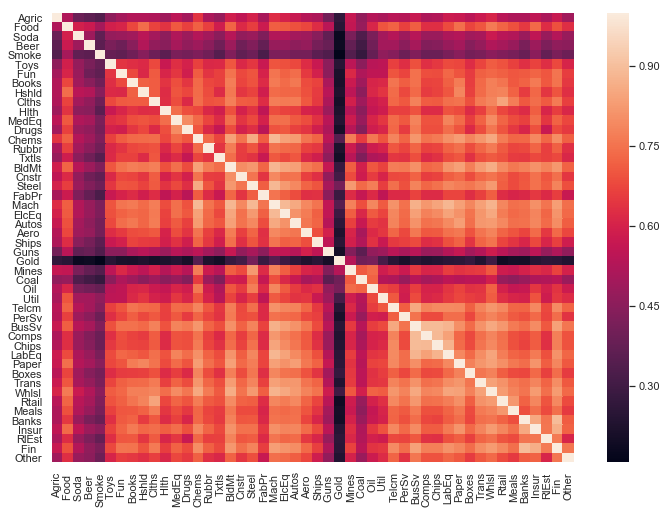

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Time Series Cross Validation

In [12]:
X_train = df1[:1323]
X_test = df1[1323:1827]

### Portfolio Optimization

In [90]:
def portfolio_daily_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_train))
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(48)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [96]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [97]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 131.73
Volatility: 30.48


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   2.64    3.3   0.05    2.0   3.58   1.25   2.97   0.54   2.88   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   3.61  ...     3.52    0.6   0.98   2.65    2.7   2.63   2.31   

            RlEst  Fin    Other  
allocation   1.57    1.4   3.09  

[1 rows x 48 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 118.44
Volatility: 29.32


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   3.83   1.72   2.05   4.98   0.18   2.83   4.75   3.17   4.26   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   1.13  ...     3.01   1.37   4.91   3.7

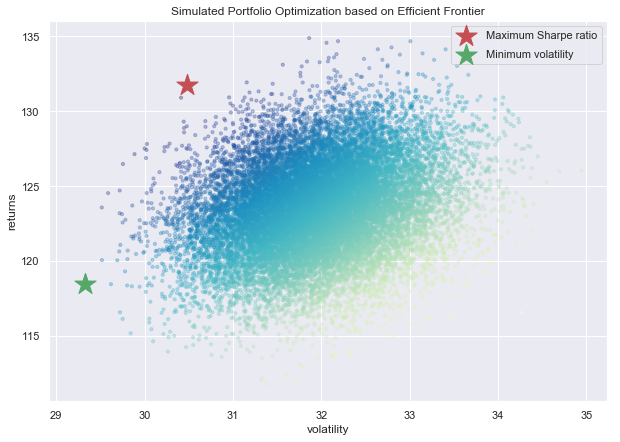

In [98]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [94]:
Test_B = np.dot(min_vol_allocation.values, X_test.T.values)
Test_B.std()

186.53314618660767

In [95]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

-0.14615413698499732

### Portfolio Optimization - LASSO Regularized

In [28]:
def portfolio_daily_performance1(weights, mean_returns, cov_matrix, lam):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_train)) + lam*np.sum(np.absolute(weights))
    return std, returns
  
def random_portfolios1(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(48) - 1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance1(weights, mean_returns, cov_matrix, lam)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [29]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam):
    results, weights = random_portfolios1(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [30]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_lasso[np.argmin(vol_lasso)]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 203.05
Volatility: 39.03


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation  17.54 -14.56  16.72  -0.89  15.46  13.45   6.65 -13.77  13.83   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation    5.8  ...    -3.09  -7.53   8.74 -10.01   1.63  -4.08  -8.77   

            RlEst  Fin    Other  
allocation  12.01  -1.03   3.83  

[1 rows x 48 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 120.84
Volatility: 26.85


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   4.85   4.83  -4.04   4.44   4.45   3.73   6.65   8.19    5.3   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation    3.4  ...     3.45  -5.74  -0.93  -3.6

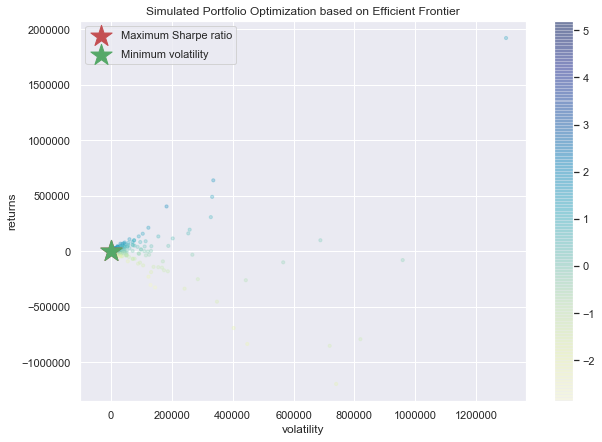

In [31]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam)

In [32]:
Test_B = np.dot(min_vol_allocation.values[0], X_test.T.values)
Test_B.std()

183.49138963233855

In [33]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

-0.18773743590379802

#### Finding the best lambda by GridSearch

In [25]:
def portfolio_daily_performance1(weights, mean_returns, cov_matrix, lam):
    returns = np.sum(mean_returns*weights)*len(X_test)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_test)) + lam*np.sum(np.absolute(weights))
    return std, returns
  
def random_portfolios1(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(48) - 1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance1(weights, mean_returns, cov_matrix, lam)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [26]:
mean_returns = X_test.mean()
cov_matrix = X_test.cov()
num_portfolios = 50000
risk_free_rate = 0.0178
results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
min_vol_idx = np.argmin(results[0])
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
min_vol_allocation_test = min_vol_allocation.T
Test_B = np.dot(min_vol_allocation_test.values, X_test.T.values)

In [27]:
(np.sum(X_test.mean()*min_vol_allocation_test.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std(), Test_B.std()

(0.0801851585874044, 120.81924100006435)

In [21]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [22]:
lams = np.arange(0,1,0.01)
vol = []
mses = []
for lam in lams: 
    results, weights = random_portfolios1(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam)
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation_train = min_vol_allocation.T
    Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
    vol.append(Test_A.std())

In [23]:
lams_lasso = lams
vol_lasso = vol

Text(0.5, 1.0, 'LASSO')

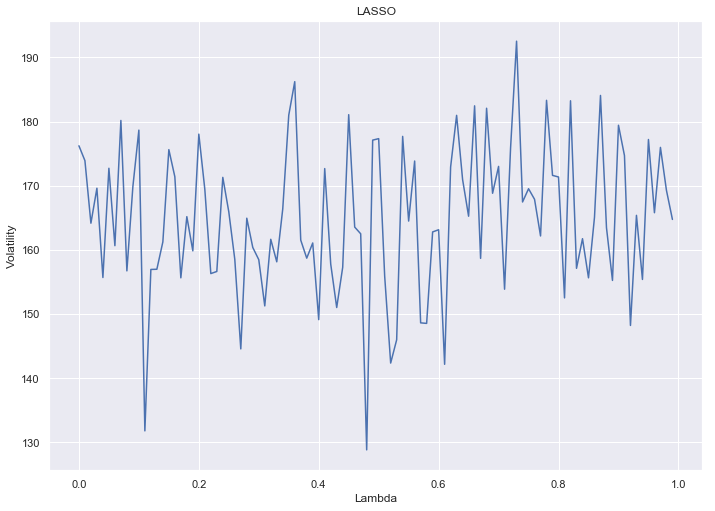

In [24]:
sns.lineplot(x = lams_lasso, y = vol_lasso)
plt.xlabel('Lambda')
plt.ylabel('Volatility')
plt.title('LASSO')

### Portfolio Optimization - Ridge Regularization

In [34]:
def portfolio_daily_performance2(weights, mean_returns, cov_matrix, lam):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_train)) + lam*np.sum(weights**2)
    return std, returns
  
def random_portfolios2(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(48) - 1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance2(weights, mean_returns, cov_matrix, lam)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [41]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam):
    results, weights = random_portfolios2(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [42]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_ridge[np.argmin(vol_ridge)]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 156.86
Volatility: 27.23


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   9.76  -4.42   4.69   3.47    8.9  -5.74  10.62   3.75  11.13   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   11.9  ...   -10.54  12.38 -10.07   5.22  13.69    4.4  11.52   

            RlEst  Fin    Other  
allocation   9.07    2.1   5.08  

[1 rows x 48 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 125.76
Volatility: 25.84


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   4.87   9.49   4.72   7.15   8.01  -3.33   6.22   4.16   6.22   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   9.79  ...    -2.91   4.21   4.09  -4.3

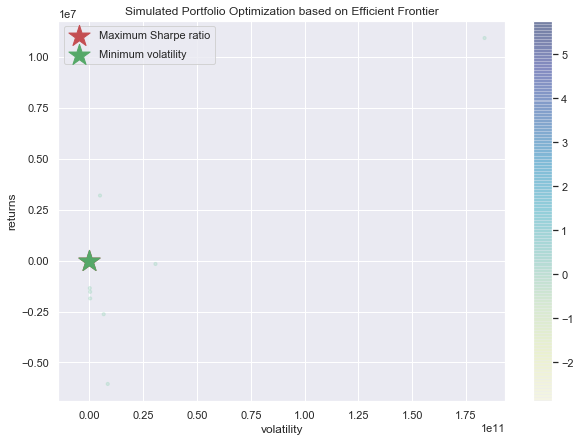

In [43]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam)

In [44]:
Test_B = np.dot(min_vol_allocation.values[0], X_test.T.values)
Test_B.std()

156.8225597962564

In [45]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

-0.2322710842580541

#### Finding the best Lambda

In [37]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [38]:
lams = np.arange(0,1,0.01)
vol = []
mses = []
for lam in lams: 
    results, weights = random_portfolios2(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam)
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation_train = min_vol_allocation.T
    Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
    vol.append(Test_A.std())

In [39]:
lams_ridge = lams
vol_ridge = vol

Text(0.5, 1.0, 'RIDGE')

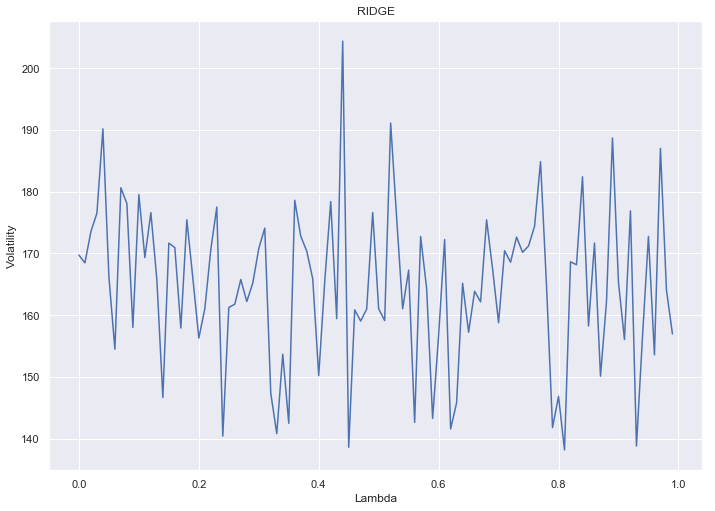

In [40]:
sns.lineplot(x = lams_ridge, y = vol_ridge)
plt.xlabel('Lambda')
plt.ylabel('Volatility')
plt.title('RIDGE')

### Portfolio Optimization - Elastic Net Regularization

In [46]:
def portfolio_daily_performance3(weights, mean_returns, cov_matrix, lam, alpha):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_train)) + lam*np.sum((0.5-alpha/2)*weights**2 + alpha*np.absolute(weights))
    return std, returns
  
def random_portfolios3(num_portfolios, mean_returns, cov_matrix, risk_free_rate, lam, alpha):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(48) - 1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance3(weights, mean_returns, cov_matrix, lam, alpha)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [55]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, alpha):
    results, weights = random_portfolios3(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam, alpha)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [57]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_EN[np.argmin(vol_EN)]
alpha = 0.5

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 176.73
Volatility: 30.85


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   1.52  12.04   7.76  -8.45   2.52   2.56  12.42 -10.53  -7.52   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   13.3  ...     7.49  10.05  -7.87   0.53  14.11   -6.3  11.41   

            RlEst  Fin    Other  
allocation  10.06   11.1   6.57  

[1 rows x 48 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 115.95
Volatility: 26.1


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   5.76   9.38   9.13   2.32   3.25   4.74   3.31   3.87   7.19   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   4.24  ...     6.04  -4.98    6.9   6.45

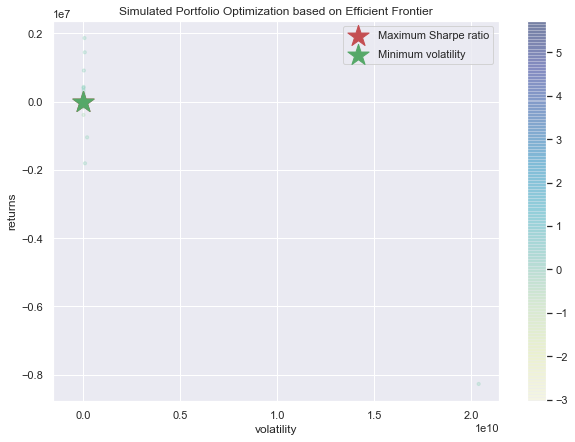

In [58]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, alpha)

In [59]:
Test_B = np.dot(min_vol_allocation.values[0], X_test.T.values)
Test_B.std()

162.11790578336579

In [60]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

-0.1764798950600285

### Finding the best lambda and alpha

In [47]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [49]:
lams = np.arange(0,1,0.1)
alphas = [0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]
vol = []
mses = []
for alpha in alphas: 
    for lam in lams:
        results, weights = random_portfolios3(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, alpha)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        vol.append(Test_A.std())

In [50]:
np.argmin(vol)

3

In [52]:
lams = np.arange(0,1,0.01)
alphas = [0.5]
vol = []
mses = []
for alpha in alphas: 
    for lam in lams:
        results, weights = random_portfolios3(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, alpha)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        vol.append(Test_A.std())

In [53]:
lams_EN = lams
vol_EN = vol

Text(0.5, 1.0, 'ELASTIC NET')

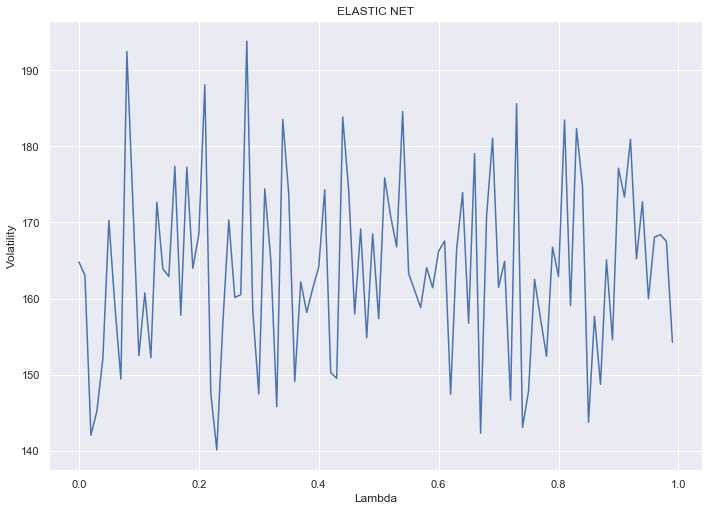

In [54]:
sns.lineplot(x = lams_EN, y = vol_EN)
plt.xlabel('Lambda')
plt.ylabel('Volatility')
plt.title('ELASTIC NET')

### Portfolio Optimization : Lq Regularization

In [61]:
def portfolio_daily_performance4(weights, mean_returns, cov_matrix, lam, q):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_train)) + lam*np.sum(np.absolute(weights)**q)
    return std, returns
  
def random_portfolios4(num_portfolios, mean_returns, cov_matrix, risk_free_rate,lam, q):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(48) - 1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance4(weights, mean_returns, cov_matrix, lam, q)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [69]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, q):
    results, weights = random_portfolios4(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam, q)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [71]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
q = 0.8
lam = lams_Lq[np.argmin(vol_Lq)]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 207.23
Volatility: 40.28


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation  11.03  25.64 -10.55   14.0   4.68   3.31  -9.63  -9.81  11.02   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  14.52  ...    15.29 -21.07  -5.54 -17.18  -5.75  18.47 -20.69   

            RlEst  Fin    Other  
allocation  11.35  21.88  -0.59  

[1 rows x 48 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 109.67
Volatility: 26.85


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   9.52    7.1   0.83   7.86   8.18   0.15  -1.89   0.07    2.2   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   8.98  ...     6.05   5.61   8.83   3.7

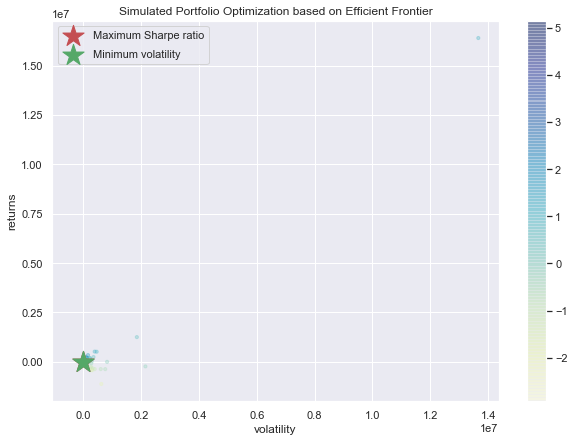

In [72]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, q)

In [73]:
Test_B = np.dot(min_vol_allocation.values[0], X_test.T.values)
Test_B.std()

138.1246820228973

In [74]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

-0.028113121732698605

### Finding the best lambda and q

In [63]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [64]:
lams = np.arange(0,1,0.1)
qs = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
vol = []
mses = []
for q in qs: 
    for lam in lams:
        results, weights = random_portfolios4(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, q)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        vol.append(Test_A.std())

In [65]:
np.argmin(vol)

46

In [66]:
lams = np.arange(0,1,0.01)
qs = [0.8]
vol = []
mses = []
for q in qs: 
    for lam in lams:
        results, weights = random_portfolios4(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, q)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        vol.append(Test_A.std())

In [67]:
lams_Lq = lams
vol_Lq = vol
mses_Lq = mses

Text(0.5, 1.0, 'Lq')

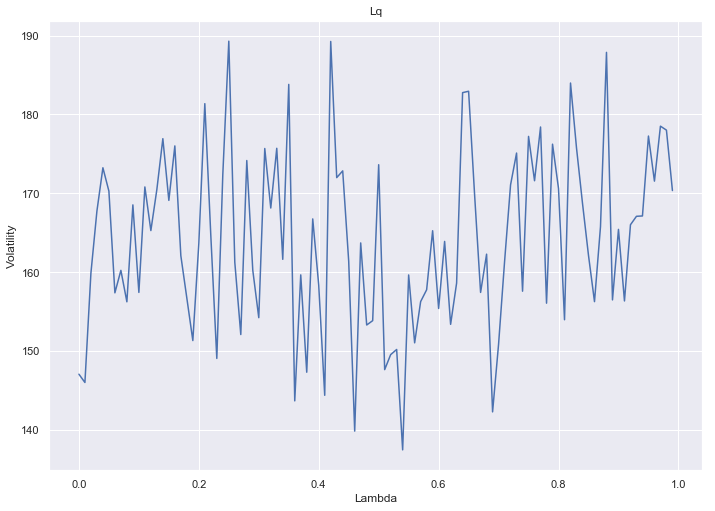

In [68]:
sns.lineplot(x = lams_Lq, y = vol_Lq)
plt.xlabel('Lambda')
plt.ylabel('Volatility')
plt.title('Lq')

### Portfolio Optimization: SCAD Regularization

In [75]:
def portfolio_daily_performance5(weights, mean_returns, cov_matrix, lam, a):
    returns = np.sum(mean_returns*weights)*len(X_train)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(len(X_train))
    for i in range(len(weights)):
        if weights[i] < lam: 
            std = std + lam*weights[i]
        if (weights[i] < a*lam) and (weights[i] >= lam):
            std = std + (2*np.absolute(weights[i])*a*lam - weights[i]**2 - lam**2)/(2*(a-1))
        else: 
            std = std + 0.5*(a+1)*lam**2
    return std, returns
  
def random_portfolios5(num_portfolios, mean_returns, cov_matrix, risk_free_rate, lam, a):
    results = np.zeros((47,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = 2*np.random.random(48) - 1
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_daily_performance5(weights, mean_returns, cov_matrix, lam, a)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [83]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, a):
    results, weights = random_portfolios5(num_portfolios,mean_returns, cov_matrix, risk_free_rate, lam, a)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df1.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Return:", round(rp,2))
    print( "Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Return:", round(rp_min,2))
    print( "Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('volatility')
    plt.ylabel('returns')
    plt.legend(labelspacing=0.8)
    return min_vol_allocation, max_sharpe_allocation

In [84]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 100000
risk_free_rate = 0.0178
lam = lams_scad[np.argmin(vol_scad)]
a = 0.2

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Return: 202.59
Volatility: 34.42


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   -3.3  16.03 -13.01  13.44  12.52   0.28  14.57 -15.77  15.67   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation  17.03  ...     3.52  -1.04  -0.04 -11.57  -3.68  11.73 -13.36   

            RlEst  Fin    Other  
allocation  -6.09   4.69  -4.28  

[1 rows x 48 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Return: 118.29
Volatility: 25.36


            Agric  Food   Soda   Beer   Smoke  Toys   Fun    Books  Hshld  \
allocation   0.48  -4.04   6.43   6.75   4.04   7.54   8.71   9.62   3.31   

            Clths  ...    Boxes  Trans  Whlsl  Rtail  Meals  Banks  Insur  \
allocation   3.68  ...     4.47   2.95  -7.93    3.

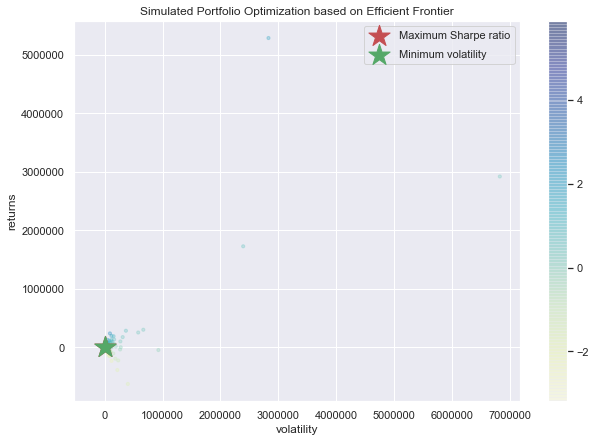

In [85]:
min_vol_allocation, max_sharpe_allocation = display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate, lam, a)

In [86]:
Test_B = np.dot(min_vol_allocation.values[0], X_test.T.values)
Test_B.std()

168.54064893143777

In [87]:
(np.sum(X_test.mean()*min_vol_allocation.values[0]/100)*len(X_test) - risk_free_rate) / Test_B.std()

-0.2490088133995057

In [88]:
lams_lasso[np.argmin(vol_lasso)], lams_ridge[np.argmin(vol_ridge)], lams_Lq[np.argmin(vol_Lq)]

(0.48, 0.81, 0.54)

In [89]:
lams_scad[np.argmin(vol_scad)]

0.09

### Finding best lambda and a

In [77]:
mean_returns = X_train.mean()
cov_matrix = X_train.cov()
num_portfolios = 20000
risk_free_rate = 0.0178

In [78]:
lams = np.arange(0,1,0.1)
aas = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
vol = []
mses = []
for a in aas: 
    for lam in lams:
        results, weights = random_portfolios5(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, a)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        vol.append(Test_A.std())

In [79]:
np.argmin(vol)

15

In [80]:
lams = np.arange(0,1,0.01)
aas = [0.2]
vol = []
mses = []
for a in aas: 
    for lam in lams:
        results, weights = random_portfolios5(num_portfolios,mean_returns, cov_matrix, risk_free_rate,lam, a)
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df1.columns,columns=['allocation'])
        min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
        min_vol_allocation_train = min_vol_allocation.T
        Test_A = np.dot(min_vol_allocation_train.values, X_test.T.values)
        vol.append(Test_A.std())

In [81]:
lams_scad = lams
vol_scad = vol

Text(0.5, 1.0, 'SCAD')

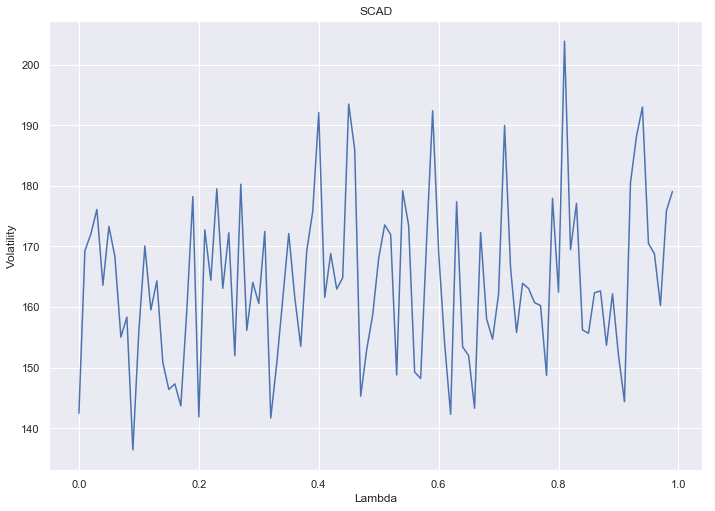

In [82]:
sns.lineplot(x = lams_scad, y = vol_scad)
plt.xlabel('Lambda')
plt.ylabel('Volatility')
plt.title('SCAD')